# 投資指標について情報係数を求めてその投資指標がどれだけ役にたつか評価する(RSIについて)

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import talib as ta
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

sns.set_style("whitegrid")

In [2]:
start = '2016-01-01'
end = '2021-01-28'

dt = data.DataReader('^N225','yahoo',start,end)

In [3]:
dt.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,18951.119141,18394.429688,18818.580078,18450.980469,140200000.0,18450.980469
2016-01-05,18547.380859,18327.519531,18398.759766,18374.000000,132300000.0,18374.000000
2016-01-06,18469.380859,18064.300781,18410.570312,18191.320312,142200000.0,18191.320312
2016-01-07,18172.039062,17767.339844,18139.769531,17767.339844,168000000.0,17767.339844
2016-01-08,17975.310547,17509.640625,17562.230469,17697.960938,184300000.0,17697.960938
2016-01-12,17546.570312,17184.779297,17470.929688,17218.960938,178400000.0,17218.960938
2016-01-13,17717.750000,17414.550781,17449.119141,17715.630859,145900000.0,17715.630859
2016-01-14,17393.830078,16944.410156,17384.929688,17240.949219,178300000.0,17240.949219
2016-01-15,17597.869141,17057.599609,17522.460938,17147.109375,167800000.0,17147.109375


In [4]:
# RSIの計算
close = dt['Adj Close']
dt['RSI']=ta.RSI(close,timeperiod=14)

In [5]:
dt.tail()

,High,Low,Open,Close,Volume,Adj Close,RSI
Date,,,,,,,
2021-01-22,28698.179688,28527.160156,28580.199219,28631.449219,66900000.0,28631.449219,70.720734
2021-01-25,28822.289062,28566.849609,28698.890625,28822.289062,57300000.0,28822.289062,72.783933
2021-01-26,28740.710938,28527.810547,28696.300781,28546.179688,63500000.0,28546.179688,65.583293
2021-01-27,28754.990234,28542.000000,28665.339844,28635.210938,69000000.0,28635.210938,66.726386
2021-01-28,28360.480469,27975.849609,28169.269531,28197.419922,123900000.0,28197.419922,56.745820


In [6]:
dt['daily return']=close.pct_change()

In [7]:
dt.tail()

,High,Low,Open,Close,Volume,Adj Close,RSI,daily return
Date,,,,,,,,
2021-01-22,28698.179688,28527.160156,28580.199219,28631.449219,66900000.0,28631.449219,70.720734,-0.004361
2021-01-25,28822.289062,28566.849609,28698.890625,28822.289062,57300000.0,28822.289062,72.783933,0.006665
2021-01-26,28740.710938,28527.810547,28696.300781,28546.179688,63500000.0,28546.179688,65.583293,-0.009580
2021-01-27,28754.990234,28542.000000,28665.339844,28635.210938,69000000.0,28635.210938,66.726386,0.003119
2021-01-28,28360.480469,27975.849609,28169.269531,28197.419922,123900000.0,28197.419922,56.745820,-0.015289


In [8]:
X = dt['RSI'][15:]
Y = dt['daily return'][14:-1]
len(Y)

1225

Text(0, 0.5, 'Daily return')

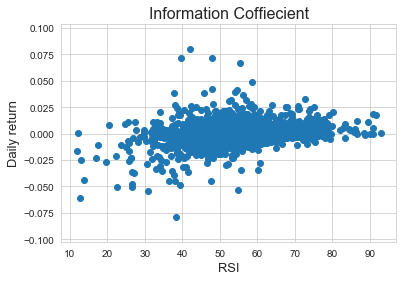

In [15]:
plt.scatter(X,Y)
plt.title("Information Coffiecient",fontsize=16)
plt.xlabel("RSI",fontsize=13)
plt.ylabel("Daily return",fontsize=13)

In [16]:
from sklearn.linear_model import LinearRegression

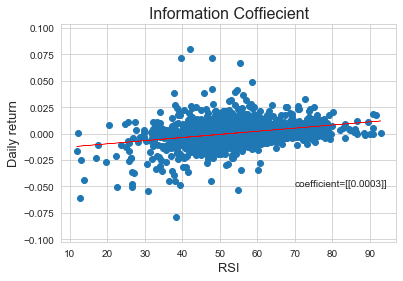

In [38]:
mod = LinearRegression()
x = pd.DataFrame(X)
y = pd.DataFrame(Y)

mod_lin = mod.fit(x,y)
y_lin_fit = mod_lin.predict(x)
coef = mod_lin.coef_

plt.scatter(X,Y)
plt.title("Information Coffiecient",fontsize=16)
plt.xlabel("RSI",fontsize=13)
plt.ylabel("Daily return",fontsize=13)
plt.text(70,-0.05,'coefficient='+str(np.round(coef,4)))
plt.plot(x,y_lin_fit,color='red',linewidth=0.5)

### 情報係数は0.0003
##### 情報係数(IC)は0.05以上あれば優秀らしいのでRSIのみを投資指標として使うのはほとんど役に立たないことがわかる